#  T-20 World Cup 2022 Data Analysis

### Importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Dataset**

In [2]:
path= r"C:\Users\hp\Downloads\T-20 World cup 2022.csv"
details=pd.read_csv(path)
#details.set_index('match_id',inplace=True)
details.sample(5)

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
7904,13010,1298142,WI v ZIM,WI,ZIM,WI,1,4,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full toss to start, 86mph/138kph with a hint o...",<p>Muzarabani. Over the wicket</p><p>Useful st...,NaN
8180,19040,1298141,IRE v SCOT,SCOT,IRE,SCOT,1,10,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,good length just outside off stump. Guided to ...,NaN,NaN
920,214030,1298176,INDIA v ZIM,INDIA,ZIM,ZIM,2,15,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"ooh, just clears the deep square leg fielder. ...",NaN,NaN
647,210010,1298177,NZ v PAK,NZ,PAK,PAK,2,11,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,short and shoved down the leg side. Re-set the...,<p>Thanks Alan. Pakistan are racing towards vi...,NaN
7849,214040,1298143,NED v SL,SL,NED,NED,2,15,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Back of a length on off, opens the face and gu...",NaN,NaN


### **Dataset Exploration**

In [3]:
details.shape

(9814, 44)

In [4]:
details.columns

Index(['comment_id', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt', 'text', 'preText', 'postText'],
      dtype='object')

In [5]:
details.duplicated()
details.drop_duplicates(inplace= True)

In [6]:
details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9813 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9813 non-null   int64  
 1   match_id           9813 non-null   int64  
 2   match_name         9813 non-null   object 
 3   home_team          9813 non-null   object 
 4   away_team          9813 non-null   object 
 5   current_innings    9813 non-null   object 
 6   innings_id         9813 non-null   int64  
 7   over               9813 non-null   int64  
 8   ball               9813 non-null   int64  
 9   runs               9813 non-null   int64  
 10  shortText          9813 non-null   object 
 11  isBoundary         9813 non-null   bool   
 12  isWide             9813 non-null   bool   
 13  isNoball           9813 non-null   bool   
 14  batsman1_id        9813 non-null   int64  
 15  batsman1_name      9813 non-null   object 
 16  batsman1_runs      9813 non-n

In [7]:
details.isnull().sum()

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9262
wkt_batsman_name     9262
wkt_bowler_name      9262
wkt_batsman_runs     9262
wkt_batsman_

**T20 WC participated Teams**

In [8]:
details.rename(columns={'current_innings':'batting_team'}, inplace= True)
details['batting_team'].unique()

array(['PAK', 'ENG', 'INDIA', 'NZ', 'ZIM', 'BAN', 'NED', 'SA', 'SL',
       'AUS', 'AFG', 'IRE', 'SCOT', 'WI', 'UAE', 'NAM'], dtype=object)

We will focus on Top 10 teams so that our analysis is short and clear

In [9]:
top10= ['INDIA','ENG','PAK','NZ','BAN','SA','SL','AUS','WI','AFG']

In [10]:
country = details['batting_team'].unique()
print(country)

['PAK' 'ENG' 'INDIA' 'NZ' 'ZIM' 'BAN' 'NED' 'SA' 'SL' 'AUS' 'AFG' 'IRE'
 'SCOT' 'WI' 'UAE' 'NAM']


In [11]:
print(details['match_name'].unique())

['ENG v PAK' 'ENG v INDIA' 'NZ v PAK' 'INDIA v ZIM' 'BAN v PAK' 'NED v SA'
 'ENG v SL' 'AUS v AFG' 'IRE v NZ' 'PAK v SA' 'BAN v INDIA' 'NED v ZIM'
 'ENG v NZ' 'AFG v SL' 'AUS v IRE' 'INDIA v SA' 'NED v PAK' 'BAN v ZIM'
 'NZ v SL' 'PAK v ZIM' 'INDIA v NED' 'BAN v SA' 'ENG v IRE' 'AUS v SL'
 'SA v ZIM' 'BAN v NED' 'INDIA v PAK' 'IRE v SL' 'AFG v ENG' 'AUS v NZ'
 'SCOT v ZIM' 'IRE v WI' 'NAM v UAE' 'NED v SL' 'WI v ZIM' 'IRE v SCOT'
 'SL v UAE' 'NAM v NED' 'IRE v ZIM' 'SCOT v WI' 'NED v UAE' 'NAM v SL']


In [12]:
# Split 'match_name' into two new columns: 'team1' and 'team2'
details[['team1', 'team2']] = details['match_name'].str.split(' v ', expand=True)

# Add a new column 'bowling_team' with the team not present in 'current_inning'
details['bowling_team'] = details.apply(lambda row: row['team2'] if row['batting_team'] == row['team1'] else row['team1'], axis=1)

details.drop(columns= ['team1', 'team2'], inplace= True )
details['bowling_team'].unique()

array(['ENG', 'PAK', 'INDIA', 'NZ', 'ZIM', 'BAN', 'SA', 'NED', 'SL',
       'AFG', 'AUS', 'IRE', 'SCOT', 'WI', 'NAM', 'UAE'], dtype=object)

In [13]:
def filtered_df(details, columns, top_teams):
    condition = details['batting_team'].isin(top_teams) & details['bowling_team'].isin(top_teams)
    return details.loc[condition, columns]

**World Top10 highest scorer batsman**

In [14]:
batting_df1= ['batting_team','batsman1_name','batsman1_runs']
for i in country:
    filtered1 = filtered_df(details,batting_df1,top10)
filtered1.rename(columns={'batsman1_name':'batsman_name'}, inplace=True)
filtered1=filtered1.groupby('batsman_name').max().sort_values(by='batsman1_runs',ascending=False)[:10]
filtered1

,batting_team,batsman1_runs
batsman_name,,
Rilee Rossouw,SA,109
Glenn Phillips,NZ,104
Devon Conway,NZ,92
Alex Hales,ENG,86
Virat Kohli,INDIA,82
Jos Buttler,ENG,80
Suryakumar Yadav,INDIA,68
Pathum Nissanka,SL,67
Dhananjaya de Silva,SL,66


In [15]:
batting_df2= ['batting_team','batsman2_name','batsman2_runs']
for i in country:
        filtered2 = filtered_df(details,batting_df2,top10)
filtered2.rename(columns={'batsman2_name':'batsman_name'}, inplace=True)
filtered2=filtered2.groupby('batsman_name').max().sort_values(by='batsman2_runs',ascending=False)[:10]
filtered2

,batting_team,batsman2_runs
batsman_name,,
Rilee Rossouw,SA,107
Glenn Phillips,NZ,104
Devon Conway,NZ,92
Alex Hales,ENG,86
Virat Kohli,INDIA,82
Jos Buttler,ENG,74
Pathum Nissanka,SL,67
Suryakumar Yadav,INDIA,66
Dhananjaya de Silva,SL,60


In [16]:
# Merge the dataframes on the 'batsman1_name' and 'batsman2_name' columns

merged_df = pd.merge(filtered1, filtered2, on=('batsman_name','batting_team'))
merged_df

,batting_team,batsman1_runs,batsman2_runs
batsman_name,,,
Rilee Rossouw,SA,109,107
Glenn Phillips,NZ,104,104
Devon Conway,NZ,92,92
Alex Hales,ENG,86,86
Virat Kohli,INDIA,82,82
Jos Buttler,ENG,80,74
Suryakumar Yadav,INDIA,68,66
Pathum Nissanka,SL,67,67
Dhananjaya de Silva,SL,66,60


In [17]:
#Add the corresponding columns and
merged_df['batsman_runs'] = merged_df['batsman1_runs'] + merged_df['batsman2_runs']
 #Dropping the extra columns
merged_df.drop(columns=['batsman1_runs','batsman2_runs'], inplace= True)
merged_df 

# Display the result
result = merged_df.groupby('batsman_name').max().sort_values(by='batsman_runs',ascending=False)[:10]
result

,batting_team,batsman_runs
batsman_name,,
Rilee Rossouw,SA,216
Glenn Phillips,NZ,208
Devon Conway,NZ,184
Alex Hales,ENG,172
Virat Kohli,INDIA,164
Jos Buttler,ENG,154
Pathum Nissanka,SL,134
Suryakumar Yadav,INDIA,134
Dhananjaya de Silva,SL,126


**Highest Score of Every Indian Batsman**

In [18]:
details.loc[details['batting_team'] =='INDIA',['batting_team','batsman1_name','batsman1_runs']].groupby('batsman1_name').max().sort_values(by='batsman1_runs',ascending=False)[:5]

,batting_team,batsman1_runs
batsman1_name,,
Virat Kohli,INDIA,82
Suryakumar Yadav,INDIA,68
Hardik Pandya,INDIA,63
Rohit Sharma,INDIA,53
KL Rahul,INDIA,51


**Match-wise batting performance** /n
But our aim is to see how these batters have fared in every match they've played in. So, we'll find their cumulative sum:

In [19]:
top_runs = details[['batsman1_name','runs']].loc[details['batting_team']=='INDIA'].groupby('batsman1_name').sum().sort_values(by='runs',ascending=False)[0:5]
top_run_getters = top_runs.index
top_run_getters

Index(['Virat Kohli', 'Suryakumar Yadav', 'Hardik Pandya', 'KL Rahul',
       'Rohit Sharma'],
      dtype='object', name='batsman1_name')

In [20]:
top5_ind = details[['match_name','batsman1_name','batsman1_runs']].loc[(details['batting_team']=='INDIA') & (details['batsman1_name'].isin(top_run_getters))].groupby(['match_name','batsman1_name']).max().sort_index().unstack()
top5_ind = top5_ind.cumsum()
top5_ind

batsman1_runs                                                   
batsman1_name Hardik Pandya KL Rahul Rohit Sharma Suryakumar Yadav Virat Kohli
match_name                                                                    
BAN v INDIA             5.0     50.0          2.0             30.0        64.0
ENG v INDIA            68.0     55.0         29.0             44.0       114.0
INDIA v NED             NaN     64.0         82.0             95.0       176.0
INDIA v PAK           108.0     68.0         86.0            110.0       258.0
INDIA v SA            110.0     77.0        101.0            178.0       270.0
INDIA v ZIM           128.0    128.0        116.0            233.0       296.0

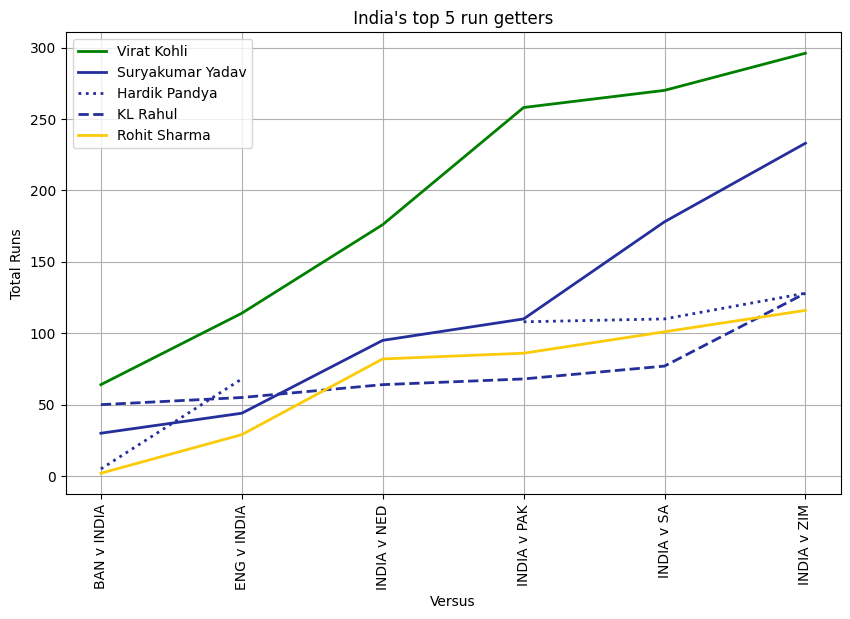

In [21]:
plt.figure(figsize=(10,6))
plt.plot(top5_ind[('batsman1_runs','Virat Kohli')], label='Virat Kohli', color='Green', linewidth=2)
plt.plot(top5_ind[('batsman1_runs','Suryakumar Yadav')], label='Suryakumar Yadav', color='#242F9B', linewidth=2)
plt.plot(top5_ind[('batsman1_runs','Hardik Pandya')], label='Hardik Pandya', color='#242F9B', linewidth=2, linestyle=':')
plt.plot(top5_ind[('batsman1_runs','KL Rahul')], label='KL Rahul', color='#242F9B', linewidth=2, linestyle='--')
plt.plot(top5_ind[('batsman1_runs','Rohit Sharma')], label='Rohit Sharma', color='#FBCB0A', linewidth=2)

plt.title(" India's top 5 run getters ")
plt.xticks(rotation=90)
plt.xlabel('Versus')
plt.ylabel('Total Runs')
plt.legend()
plt.grid()
plt.savefig('India top scorers', bbox_inches='tight')
plt.show()

So satisfying to see! Virat has been incredibly consistent with his batting. Suryakumar Yadav has been amazing too with his finishing. 

**Top 10 bowlers in world**

In [22]:
bowling_df= ['bowling_team','bowler1_name','bowler1_wkts']
for i in country:
     filtered = filtered_df(details,bowling_df,top10)
filtered.groupby('bowler1_name').max().sort_values(by='bowler1_wkts',ascending=False)[:10]

,bowling_team,bowler1_wkts
bowler1_name,,
Sam Curran,ENG,5
Trent Boult,NZ,4
Anrich Nortje,SA,4
Lungi Ngidi,SA,4
Shaheen Shah Afridi,PAK,4
Wayne Parnell,SA,3
Hardik Pandya,INDIA,3
Mark Wood,ENG,3
Mitchell Santner,NZ,3


In [23]:
details.loc[details['bowling_team'] =='INDIA',['bowling_team','bowler1_name','bowler1_wkts']].groupby('bowler1_name').max().sort_values(by='bowler1_wkts',ascending=False)[:5]

,bowling_team,bowler1_wkts
bowler1_name,,
Arshdeep Singh,INDIA,3
Hardik Pandya,INDIA,3
Ravichandran Ashwin,INDIA,3
Axar Patel,INDIA,2
Bhuvneshwar Kumar,INDIA,2


Since our analysis is mostly on INDIA, we create a dataframe containing only INDIA's games:

In [24]:
IND_results=details.loc[(details['home_team']=='INDIA') | (details['away_team']=='INDIA'), :].copy()
IND_results.drop(columns=['home_team','away_team'], inplace= True)
IND_results.columns

Index(['comment_id', 'match_id', 'match_name', 'batting_team', 'innings_id',
       'over', 'ball', 'runs', 'shortText', 'isBoundary', 'isWide', 'isNoball',
       'batsman1_id', 'batsman1_name', 'batsman1_runs', 'batsman1_balls',
       'bowler1_id', 'bowler1_name', 'bowler1_overs', 'bowler1_maidens',
       'bowler1_runs', 'bowler1_wkts', 'batsman2_id', 'batsman2_name',
       'batsman2_runs', 'batsman2_balls', 'bowler2_id', 'bowler2_name',
       'bowler2_overs', 'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts',
       'wicket_id', 'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText', 'bowling_team'],
      dtype='object')

Let's now do the same to see India's bowlers performance.

In [25]:
ind_match_id=IND_results['match_id']

ind_match_id

243     1298178
244     1298178
245     1298178
246     1298178
247     1298178
         ...   
6231    1298150
6232    1298150
6233    1298150
6234    1298150
6235    1298150
Name: match_id, Length: 1417, dtype: int64

List of all bowlers who bowled more than one ball

In [26]:
ind_details = details.loc[details['match_id'].isin(ind_match_id)]
ind_bowling = ind_details.loc[(ind_details['batting_team']!='INDIA') & (ind_details['wkt_text']!="")]

ind_top_bowlers = ind_bowling['bowler1_name'].value_counts()[:].index
ind_top_bowlers

Index(['Arshdeep Singh', 'Mohammed Shami', 'Ravichandran Ashwin',
       'Bhuvneshwar Kumar', 'Hardik Pandya', 'Axar Patel'],
      dtype='object', name='bowler1_name')

In [27]:
ind_bowling.sample(5)

,comment_id,match_id,match_name,home_team,away_team,batting_team,innings_id,over,ball,runs,...,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText,bowling_team
3712,27020,1298164,INDIA v SA,INDIA,SA,SA,2,8,2,0,...,NaN,NaN,NaN,NaN,NaN,False,banged in short this time. Miller was on the f...,NaN,NaN,INDIA
3764,215050,1298164,INDIA v SA,INDIA,SA,SA,2,16,5,1,...,NaN,NaN,NaN,NaN,NaN,False,"Length ball on middle and leg, works it wide o...",<p>Tristan Stubbs is in at no. 6.</p>,NaN,INDIA
2510,23030,1298169,BAN v INDIA,INDIA,BAN,BAN,2,4,3,3,...,NaN,NaN,NaN,NaN,NaN,False,"short, rushes Litton on the pull, and though h...",NaN,NaN,INDIA
6090,116050,1298150,INDIA v PAK,PAK,INDIA,PAK,1,17,5,2,...,NaN,NaN,NaN,NaN,NaN,False,"back of a length, angling into the hip, tucked...",<p>Shaheen Shah Afridi is in at No. 9. Only fo...,NaN,INDIA
6015,14040,1298150,INDIA v PAK,PAK,INDIA,PAK,1,5,4,0,...,NaN,NaN,NaN,NaN,NaN,False,"hung wide outside off, leaves the outswinger a...",NaN,NaN,INDIA


In [28]:
ind_bowling = ind_bowling.loc[ind_bowling['bowler1_name'].isin(ind_top_bowlers)]
ind_bowling = ind_bowling[['match_id','bowler1_name','bowler1_wkts']].groupby(['match_id','bowler1_name']).max().unstack()
ind_bowling=ind_bowling.cumsum()
ind_bowling

bowler1_wkts                                              
bowler1_name Arshdeep Singh Axar Patel Bhuvneshwar Kumar Hardik Pandya   
match_id                                                                 
1298150                 3.0        0.0               1.0           3.0  \
1298157                 5.0        2.0               3.0           3.0   
1298164                 7.0        NaN               3.0           4.0   
1298169                 9.0        2.0               3.0           6.0   
1298176                10.0        3.0               4.0           8.0   
1298178                10.0        3.0               4.0           8.0   

                                                 
bowler1_name Mohammed Shami Ravichandran Ashwin  
match_id                                         
1298150                 1.0                 0.0  
1298157                 2.0                 2.0  
1298164                 3.0                 3.0  
1298169                 4.0                 3.0  
1298176                 6.0                 6.0  
1298178                 6.0                 6.0

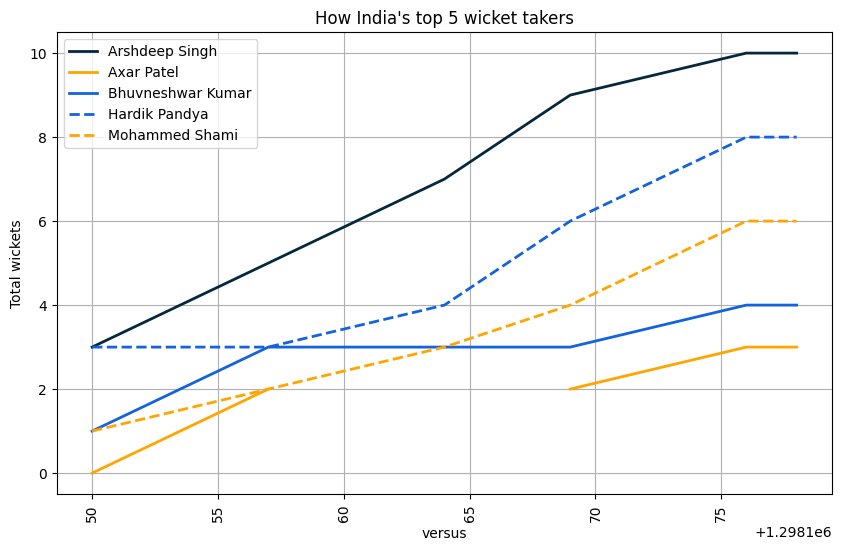

In [29]:
plt.figure(figsize=(10,6))
# plt.style.use('seaborn')
plt.plot(ind_bowling['bowler1_wkts','Arshdeep Singh'],color='#06283D',linewidth=2, label='Arshdeep Singh')
plt.plot(ind_bowling['bowler1_wkts','Axar Patel'],color='#FFA500',linewidth=2, label='Axar Patel')
plt.plot(ind_bowling['bowler1_wkts','Bhuvneshwar Kumar'],color='#1363DF',linewidth=2, label='Bhuvneshwar Kumar')
plt.plot(ind_bowling['bowler1_wkts','Hardik Pandya'],color='#1363DF',linewidth=2, linestyle='--', label='Hardik Pandya')
plt.plot(ind_bowling['bowler1_wkts','Mohammed Shami'],color='#FFA500',linestyle='--',linewidth=2, label='Mohammed Shami')
plt.xlabel('versus')
plt.ylabel('Total wickets')
plt.xticks(rotation=90)
plt.title("How India's top 5 wicket takers")
plt.legend()
plt.grid(True)
# plt.savefig('top wicket takers.png',bbox_inches='tight')
plt.show()

Arshdeep Singh stands out by a mile! He's been INDIA's best bowling asset this season. Hardik Pandya had a decent run in this season too.

**Wicket Analysis**

In [30]:
wkt_df= details[['match_id','match_name','batting_team','bowling_team','wicket_id', 'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text']]
wkt_df

,match_id,match_name,batting_team,bowling_team,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text
0,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
1,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
2,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
3,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
4,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9809,1298135,NAM v SL,SL,NAM,NaN,NaN,NaN,NaN,NaN,NaN
9810,1298135,NAM v SL,SL,NAM,NaN,NaN,NaN,NaN,NaN,NaN
9811,1298135,NAM v SL,SL,NAM,NaN,NaN,NaN,NaN,NaN,NaN
9812,1298135,NAM v SL,SL,NAM,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
column_list = ['match_id', 'match_name', 'batting_team', 'bowling_team', 'wicket_id',
               'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text']

wkt_df = filtered_df(details, column_list, top10)
wkt_df

,match_id,match_name,batting_team,bowling_team,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text
0,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
1,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
2,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
3,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
4,1298179,ENG v PAK,PAK,ENG,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6912,1298147,AUS v NZ,AUS,NZ,379504.0,Adam Zampa,Trent Boult,0.0,2.0,A Zampa b Boult 0 (3m 2b 0x4 0x6) SR: 0.00
6913,1298147,AUS v NZ,AUS,NZ,NaN,NaN,NaN,NaN,NaN,NaN
6914,1298147,AUS v NZ,AUS,NZ,NaN,NaN,NaN,NaN,NaN,NaN
6915,1298147,AUS v NZ,AUS,NZ,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
wkt_df.isnull().sum()

match_id                0
match_name              0
batting_team            0
bowling_team            0
wicket_id            3789
wkt_batsman_name     3789
wkt_bowler_name      3789
wkt_batsman_runs     3789
wkt_batsman_balls    3789
wkt_text             3789
dtype: int64

In [33]:
wkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4005 entries, 0 to 6916
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_id           4005 non-null   int64  
 1   match_name         4005 non-null   object 
 2   batting_team       4005 non-null   object 
 3   bowling_team       4005 non-null   object 
 4   wicket_id          216 non-null    float64
 5   wkt_batsman_name   216 non-null    object 
 6   wkt_bowler_name    216 non-null    object 
 7   wkt_batsman_runs   216 non-null    float64
 8   wkt_batsman_balls  216 non-null    float64
 9   wkt_text           216 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 344.2+ KB


In [34]:
wkt_df1= wkt_df.dropna(subset=['wicket_id'],inplace= True)

In [35]:
wkt_df

,match_id,match_name,batting_team,bowling_team,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text
28,1298179,ENG v PAK,PAK,ENG,323389.0,Mohammad Rizwan,Sam Curran,15.0,14.0,Mohammad Rizwan b Curran 15 (24m 14b 0x4 1x6)...
46,1298179,ENG v PAK,PAK,ENG,1205559.0,Mohammad Haris,Adil Rashid,8.0,12.0,Mohammad Haris c Stokes b Rashid 8 (15m 12b 1x...
72,1298179,ENG v PAK,PAK,ENG,348144.0,Babar Azam,Adil Rashid,32.0,28.0,Babar Azam c &amp; b Rashid 32 (58m 28b 2x4 0x...
79,1298179,ENG v PAK,PAK,ENG,480603.0,Iftikhar Ahmed,Ben Stokes,0.0,6.0,Iftikhar Ahmed c &dagger;Buttler b Stokes 0 (8...
105,1298179,ENG v PAK,PAK,ENG,233901.0,Shan Masood,Sam Curran,38.0,28.0,Shan Masood c Livingstone b Curran 38 (46m 28b...
...,...,...,...,...,...,...,...,...,...,...
6885,1298147,AUS v NZ,AUS,NZ,230193.0,Matthew Wade,Lockie Ferguson,2.0,4.0,MS Wade c &dagger;Conway b Ferguson 2 (10m 4b ...
6893,1298147,AUS v NZ,AUS,NZ,325026.0,Glenn Maxwell,Ish Sodhi,28.0,20.0,GJ Maxwell b Sodhi 28 (47m 20b 3x4 1x6) SR: 1...
6910,1298147,AUS v NZ,AUS,NZ,311592.0,Mitchell Starc,Trent Boult,4.0,7.0,MA Starc b Boult 4 (13m 7b 0x4 0x6) SR: 57.14
6912,1298147,AUS v NZ,AUS,NZ,379504.0,Adam Zampa,Trent Boult,0.0,2.0,A Zampa b Boult 0 (3m 2b 0x4 0x6) SR: 0.00


**To find the details of the wickets taken by a player**

In [36]:
player_name= input("Enter the name of the bowler: ")
df= wkt_df.loc[wkt_df['wkt_bowler_name']==player_name]
df

Enter the name of the bowler: Hardik Pandya


,match_id,match_name,batting_team,bowling_team,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text
2564,1298169,BAN v INDIA,BAN,INDIA,629059.0,Yasir Ali,Hardik Pandya,1.0,3.0,Yasir Ali c Arshdeep Singh b Pandya 1 (8m 3b 0...
2567,1298169,BAN v INDIA,BAN,INDIA,550133.0,Mosaddek Hossain,Hardik Pandya,6.0,3.0,Mosaddek Hossain b Pandya 6 (4m 3b 0x4 1x6) S...
3763,1298164,INDIA v SA,SA,INDIA,600498.0,Aiden Markram,Hardik Pandya,52.0,41.0,AK Markram c Yadav b Pandya 52 (72m 41b 6x4 1x...
6068,1298150,INDIA v PAK,PAK,INDIA,922943.0,Shadab Khan,Hardik Pandya,5.0,6.0,Shadab Khan c Yadav b Pandya 5 (6m 6b 1x4 0x6)...
6072,1298150,INDIA v PAK,PAK,INDIA,1168651.0,Haider Ali,Hardik Pandya,2.0,4.0,Haider Ali c Yadav b Pandya 2 (6m 4b 0x4 0x6) ...
6084,1298150,INDIA v PAK,PAK,INDIA,348148.0,Mohammad Nawaz,Hardik Pandya,9.0,6.0,Mohammad Nawaz (3) c &dagger;Karthik b Pandya ...


In [39]:
print("Total wickets taken by {} is {}.".format(player_name, df.shape[0]))

Total wickets taken by Hardik Pandya is 6.
